[View in Colaboratory](https://colab.research.google.com/github/CPotnis/ReactJS-Assignment4/blob/master/LSTM_S&P500.ipynb)

In [0]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr

import warnings
import matplotlib.pyplot as plt
import functools as ft
#import pandas_talib as TA
import operator
import datetime
from sklearn.preprocessing import MinMaxScaler
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
start = "1995-01-01" 
end = "2017-12-17"
SP = pdr.get_data_yahoo("^GSPC",start,end)

[*********************100%***********************]  1 of 1 downloaded


In [3]:
SP.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,459.209991,459.269989,457.200012,459.109985,459.109985,262450000
1995-01-04,459.130005,460.720001,457.559998,460.709991,460.709991,319510000
1995-01-05,460.730011,461.299988,459.750000,460.339996,460.339996,309050000
1995-01-06,460.380005,462.489990,459.470001,460.679993,460.679993,308070000
1995-01-09,460.670013,461.769989,459.739990,460.829987,460.829987,278790000


In [4]:
cl = SP.Open
scl = MinMaxScaler()
#Scale the data
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [0]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,60)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Using TensorFlow backend.


In [8]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
4576/4576 [==============================] - 34s 7ms/step - loss: 0.0055
Epoch 2/100
4576/4576 [==============================] - 32s 7ms/step - loss: 0.0012
Epoch 3/100
4576/4576 [==============================] - 32s 7ms/step - loss: 0.0010
Epoch 4/100
2720/4576 [================>.............] - ETA: 12s - loss: 9.9189e-04

4576/4576 [==============================] - 32s 7ms/step - loss: 9.3469e-04
Epoch 5/100
4576/4576 [==============================] - 32s 7ms/step - loss: 8.5556e-04
Epoch 6/100
4576/4576 [==============================] - 32s 7ms/step - loss: 8.3383e-04
Epoch 7/100
3424/4576 [=====================>........] - ETA: 8s - loss: 7.8248e-04

4576/4576 [==============================] - 32s 7ms/step - loss: 7.4945e-04
Epoch 8/100
4576/4576 [==============================] - 32s 7ms/step - loss: 7.0698e-04
Epoch 9/100
4576/4576 [==============================] - 32s 7ms/step - loss: 6.5277e-04
Epoch 10/100
3584/4576 [======================>.......] - ETA: 7s - loss: 5.6367e-04

4576/4576 [==============================] - 32s 7ms/step - loss: 5.6540e-04
Epoch 11/100
4576/4576 [==============================] - 32s 7ms/step - loss: 5.7643e-04
Epoch 12/100
4576/4576 [==============================] - 33s 7ms/step - loss: 5.0299e-04
Epoch 13/100
3552/4576 [======================>.......] - ETA: 7s - loss: 5.0072e-04

4576/4576 [==============================] - 32s 7ms/step - loss: 4.9530e-04
Epoch 14/100
4576/4576 [==============================] - 32s 7ms/step - loss: 4.5191e-04
Epoch 15/100
4576/4576 [==============================] - 32s 7ms/step - loss: 4.1242e-04
Epoch 16/100
3552/4576 [======================>.......] - ETA: 7s - loss: 3.9368e-04

4576/4576 [==============================] - 32s 7ms/step - loss: 4.0130e-04
Epoch 17/100
4576/4576 [==============================] - 32s 7ms/step - loss: 4.0038e-04
Epoch 18/100
4576/4576 [==============================] - 32s 7ms/step - loss: 3.6538e-04
Epoch 19/100
3552/4576 [======================>.......] - ETA: 7s - loss: 3.4057e-04

4576/4576 [==============================] - 31s 7ms/step - loss: 3.3952e-04
Epoch 20/100
4576/4576 [==============================] - 31s 7ms/step - loss: 3.5114e-04
Epoch 21/100
4576/4576 [==============================] - 31s 7ms/step - loss: 3.2850e-04
Epoch 22/100
3520/4576 [======================>.......] - ETA: 6s - loss: 3.1127e-04

4576/4576 [==============================] - 30s 7ms/step - loss: 3.0431e-04
Epoch 23/100
4576/4576 [==============================] - 31s 7ms/step - loss: 2.9619e-04
Epoch 24/100
4576/4576 [==============================] - 31s 7ms/step - loss: 2.9893e-04
Epoch 25/100
3520/4576 [======================>.......] - ETA: 7s - loss: 2.8530e-04

4576/4576 [==============================] - 30s 7ms/step - loss: 2.8711e-04
Epoch 26/100
4576/4576 [==============================] - 30s 7ms/step - loss: 2.6496e-04
Epoch 27/100
4576/4576 [==============================] - 31s 7ms/step - loss: 2.9536e-04
Epoch 28/100
3520/4576 [======================>.......] - ETA: 7s - loss: 2.8816e-04

4576/4576 [==============================] - 31s 7ms/step - loss: 2.7815e-04
Epoch 29/100
4576/4576 [==============================] - 31s 7ms/step - loss: 2.4291e-04
Epoch 30/100
4576/4576 [==============================] - 31s 7ms/step - loss: 2.5580e-04
Epoch 31/100
3488/4576 [=====================>........] - ETA: 7s - loss: 2.3265e-04

4576/4576 [==============================] - 30s 7ms/step - loss: 2.3573e-04
Epoch 32/100
4576/4576 [==============================] - 31s 7ms/step - loss: 2.4280e-04
Epoch 33/100
4576/4576 [==============================] - 31s 7ms/step - loss: 2.3934e-04
Epoch 34/100
3488/4576 [=====================>........] - ETA: 7s - loss: 2.4894e-04

4576/4576 [==============================] - 30s 7ms/step - loss: 2.4288e-04
Epoch 35/100
4576/4576 [==============================] - 30s 7ms/step - loss: 2.3348e-04
Epoch 36/100
4576/4576 [==============================] - 30s 7ms/step - loss: 2.5024e-04
Epoch 37/100
3520/4576 [======================>.......] - ETA: 7s - loss: 2.2925e-04

4576/4576 [==============================] - 30s 7ms/step - loss: 2.2363e-04
Epoch 38/100
4576/4576 [==============================] - 30s 7ms/step - loss: 2.1720e-04
Epoch 39/100
4576/4576 [==============================] - 30s 7ms/step - loss: 2.3368e-04
Epoch 40/100
3520/4576 [======================>.......] - ETA: 7s - loss: 2.3263e-04

4576/4576 [==============================] - 31s 7ms/step - loss: 2.3041e-04
Epoch 41/100
4576/4576 [==============================] - 31s 7ms/step - loss: 2.0705e-04
Epoch 42/100
4576/4576 [==============================] - 31s 7ms/step - loss: 2.2409e-04
Epoch 43/100
3520/4576 [======================>.......] - ETA: 7s - loss: 2.3625e-04

4576/4576 [==============================] - 31s 7ms/step - loss: 2.3640e-04
Epoch 44/100
4576/4576 [==============================] - 31s 7ms/step - loss: 2.0711e-04
Epoch 45/100
4576/4576 [==============================] - 31s 7ms/step - loss: 2.0059e-04
Epoch 46/100
3520/4576 [======================>.......] - ETA: 7s - loss: 1.9606e-04

4576/4576 [==============================] - 31s 7ms/step - loss: 1.9639e-04
Epoch 47/100
4576/4576 [==============================] - 31s 7ms/step - loss: 2.1056e-04
Epoch 48/100
4576/4576 [==============================] - 32s 7ms/step - loss: 2.0666e-04
Epoch 49/100
3520/4576 [======================>.......] - ETA: 7s - loss: 2.0768e-04

4576/4576 [==============================] - 31s 7ms/step - loss: 2.0385e-04
Epoch 50/100
4576/4576 [==============================] - 32s 7ms/step - loss: 2.0892e-04
Epoch 51/100
4576/4576 [==============================] - 31s 7ms/step - loss: 2.0426e-04
Epoch 52/100
3520/4576 [======================>.......] - ETA: 7s - loss: 1.9373e-04

4576/4576 [==============================] - 31s 7ms/step - loss: 1.9591e-04
Epoch 53/100
4576/4576 [==============================] - 31s 7ms/step - loss: 2.0923e-04
Epoch 54/100
4576/4576 [==============================] - 31s 7ms/step - loss: 1.8849e-04
Epoch 55/100
3520/4576 [======================>.......] - ETA: 7s - loss: 1.7751e-04

4576/4576 [==============================] - 31s 7ms/step - loss: 1.9052e-04
Epoch 56/100
4576/4576 [==============================] - 31s 7ms/step - loss: 2.0004e-04
Epoch 57/100
4576/4576 [==============================] - 31s 7ms/step - loss: 1.8880e-04
Epoch 58/100
3520/4576 [======================>.......] - ETA: 7s - loss: 1.9593e-04

4576/4576 [==============================] - 32s 7ms/step - loss: 1.8996e-04
Epoch 59/100
4576/4576 [==============================] - 31s 7ms/step - loss: 1.9130e-04
Epoch 60/100
4576/4576 [==============================] - 31s 7ms/step - loss: 2.0101e-04
Epoch 61/100
3520/4576 [======================>.......] - ETA: 7s - loss: 1.9006e-04

4576/4576 [==============================] - 31s 7ms/step - loss: 1.8506e-04
Epoch 62/100
4576/4576 [==============================] - 31s 7ms/step - loss: 2.0781e-04
Epoch 63/100
4576/4576 [==============================] - 31s 7ms/step - loss: 2.0890e-04
Epoch 64/100
3520/4576 [======================>.......] - ETA: 7s - loss: 2.1009e-04

4576/4576 [==============================] - 31s 7ms/step - loss: 2.0605e-04
Epoch 65/100
4576/4576 [==============================] - 31s 7ms/step - loss: 1.9777e-04
Epoch 66/100
4576/4576 [==============================] - 31s 7ms/step - loss: 1.8665e-04
Epoch 67/100
3520/4576 [======================>.......] - ETA: 7s - loss: 2.1887e-04

4576/4576 [==============================] - 31s 7ms/step - loss: 2.1206e-04
Epoch 68/100
4576/4576 [==============================] - 31s 7ms/step - loss: 1.7973e-04
Epoch 69/100
4576/4576 [==============================] - 31s 7ms/step - loss: 1.7607e-04
Epoch 70/100
3520/4576 [======================>.......] - ETA: 7s - loss: 1.9384e-04

4576/4576 [==============================] - 31s 7ms/step - loss: 1.9217e-04
Epoch 71/100
4576/4576 [==============================] - 31s 7ms/step - loss: 1.8436e-04
Epoch 72/100
4576/4576 [==============================] - 31s 7ms/step - loss: 1.8502e-04
Epoch 73/100
3520/4576 [======================>.......] - ETA: 7s - loss: 1.9515e-04

4576/4576 [==============================] - 31s 7ms/step - loss: 1.9514e-04
Epoch 74/100
4576/4576 [==============================] - 31s 7ms/step - loss: 1.7850e-04
Epoch 75/100
4576/4576 [==============================] - 31s 7ms/step - loss: 1.9719e-04
Epoch 76/100
3520/4576 [======================>.......] - ETA: 7s - loss: 1.7733e-04

4576/4576 [==============================] - 31s 7ms/step - loss: 1.8001e-04
Epoch 77/100
4576/4576 [==============================] - 31s 7ms/step - loss: 1.7676e-04
Epoch 78/100
4576/4576 [==============================] - 31s 7ms/step - loss: 1.7933e-04
Epoch 79/100
3520/4576 [======================>.......] - ETA: 7s - loss: 1.7251e-04

4576/4576 [==============================] - 31s 7ms/step - loss: 1.7839e-04
Epoch 80/100
4576/4576 [==============================] - 31s 7ms/step - loss: 1.7871e-04
Epoch 81/100
4576/4576 [==============================] - 31s 7ms/step - loss: 1.9278e-04
Epoch 82/100
3520/4576 [======================>.......] - ETA: 7s - loss: 1.6525e-04

4576/4576 [==============================] - 31s 7ms/step - loss: 1.6254e-04
Epoch 83/100
4576/4576 [==============================] - 31s 7ms/step - loss: 1.7855e-04
Epoch 84/100
4576/4576 [==============================] - 31s 7ms/step - loss: 1.6763e-04
Epoch 85/100
3520/4576 [======================>.......] - ETA: 7s - loss: 1.6943e-04

4576/4576 [==============================] - 31s 7ms/step - loss: 1.7205e-04
Epoch 86/100
4576/4576 [==============================] - 31s 7ms/step - loss: 1.6060e-04
Epoch 87/100
4576/4576 [==============================] - 31s 7ms/step - loss: 1.7650e-04
Epoch 88/100
3520/4576 [======================>.......] - ETA: 7s - loss: 1.8421e-04

4576/4576 [==============================] - 32s 7ms/step - loss: 1.8269e-04
Epoch 89/100
4576/4576 [==============================] - 32s 7ms/step - loss: 1.6154e-04
Epoch 90/100
4576/4576 [==============================] - 32s 7ms/step - loss: 1.6512e-04
Epoch 91/100
3520/4576 [======================>.......] - ETA: 7s - loss: 1.5547e-04

4576/4576 [==============================] - 32s 7ms/step - loss: 1.5851e-04
Epoch 92/100
4576/4576 [==============================] - 32s 7ms/step - loss: 1.6881e-04
Epoch 93/100
4576/4576 [==============================] - 30s 7ms/step - loss: 1.8348e-04
Epoch 94/100
3488/4576 [=====================>........] - ETA: 7s - loss: 1.4936e-04

4576/4576 [==============================] - 30s 7ms/step - loss: 1.5615e-04
Epoch 95/100
4576/4576 [==============================] - 30s 7ms/step - loss: 1.6438e-04
Epoch 96/100
4576/4576 [==============================] - 30s 7ms/step - loss: 1.6712e-04
Epoch 97/100
3520/4576 [======================>.......] - ETA: 7s - loss: 1.7141e-04

4576/4576 [==============================] - 32s 7ms/step - loss: 1.7638e-04
Epoch 98/100
4576/4576 [==============================] - 32s 7ms/step - loss: 1.6028e-04
Epoch 99/100
4576/4576 [==============================] - 32s 7ms/step - loss: 1.6577e-04
Epoch 100/100
3520/4576 [======================>.......] - ETA: 7s - loss: 1.5548e-04

4576/4576 [==============================] - 31s 7ms/step - loss: 1.6118e-04


In [0]:
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [0]:
Xt = regressor.predict(X_test)

In [0]:
pred_normal = scl.inverse_transform(Xt)


In [0]:
y_test_normal = scl.inverse_transform(y_test.reshape(-1,1))

In [54]:
pred_normal

array([[1648.7732],
       [1630.9263],
       [1635.6105],
       ...,
       [2553.3093],
       [2559.8562],
       [2562.6167]], dtype=float32)

In [48]:
y_test_normal

array([[1631.709961],
       [1640.72998 ],
       [1629.050049],
       ...,
       [2661.72998 ],
       [2667.590088],
       [2665.870117]])

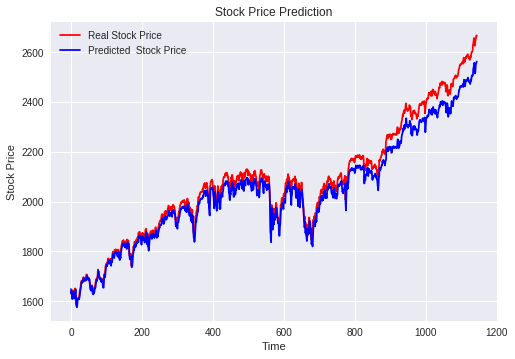

In [45]:
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), color = 'red', label = 'Real Stock Price')
plt.plot(scl.inverse_transform(Xt), color = 'blue', label = 'Predicted  Stock Price')

plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [0]:
def cal_target(df):
    list_y =[]
    temp = df
    for i in range(len(temp)-1):
        if temp[i+1] > temp[i]:
            y = 1
        else:
            y = -1
            
        list_y.append(y)
    ydf = pd.DataFrame(list_y)
    return ydf

In [0]:
y_test_trend = cal_target(y_test_normal)
pred_trend =cal_target(pred_normal)


In [58]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test_trend, pred_trend)
print(score)

0.5017482517482518


In [59]:
# Saving Model
model_json = regressor.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
regressor.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
